<a href="https://colab.research.google.com/github/kyanyoga/colab-blue-mountain/blob/master/Spooky_text_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  # multi-layer perceptron classifier  - Spooky Classifier Kaggle Example
### https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f
### http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
### http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

### Loading Data
### https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

In [1]:
# read data into python 
# place r before string for raw string
import pandas as pd
# df = pd.read_csv(r'../data/kaggle/spooky/train.csv')
url = 'https://github.com/kyanyoga/colab-blue-mountain/blob/master/data/kaggle/spooky/train.csv?raw=true'
df =  pd.read_csv(url)
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [2]:
# df_test = pd.read_csv(r'..\data\spooky\test.csv')
url = 'https://github.com/kyanyoga/colab-blue-mountain/blob/master/data/kaggle/spooky/test.csv?raw=true'
df_test = pd.read_csv(url)
df_test.head()

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


In [0]:
# col = ['id','text','author']
# df[col]

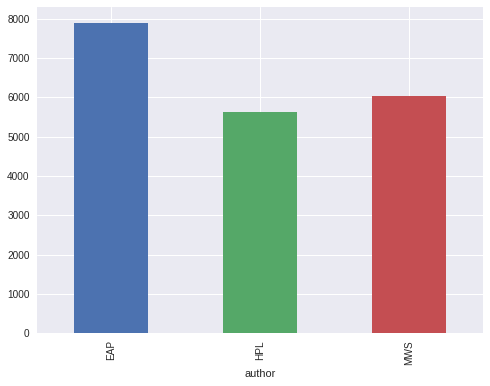

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('author').text.count().plot.bar(ylim=0)
plt.show()

We will use sklearn.feature_extraction.text.TfidfVectorizer to calculate a tf-idf vector 
for each of consumer complaint narratives:
euclidean norm of a matrix norm distance of an matrix defined as the square root of the sum 
of the absolute squares of its elements


In [0]:
# training data - feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')


In [5]:
# used in model evaluation too.
features = tfidf.fit_transform(df.text).toarray()
labels = df.author
features.shape

(19579, 8715)

In [0]:
# features2 = tfidf.fit_transform(df_test.text).toarray()
# features2.shape   - This does NOT work.. try below:

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(binary=True, use_idf=True)
tfidf_train_data = vec.fit_transform(df.text) 
tfidf_test_data = vec.transform(df_test.text)

In [7]:
# test data - feature extraction: no labels its test data: output should have test labels: 
# id	EAP	HPL	MWS
# id02310	0.403493539	0.287808366	0.308698095
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
# used in model evaluation too.
features_test = tfidf.fit_transform(df_test.text).toarray()
features_test.shape

(8392, 4387)

now each of the 19579 sentences are represented by 8715  features.

trains with Naive Bayes Classifier: the one most suitable for word counts is the multinomial variant.
datarobot used a reg logtistic regression.
#### http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['author'], random_state = 0)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)


In [9]:
# testing classifier 
print(clf.predict(count_vect.transform(["Still, as I urged our leaving Ireland with such inquietude and impatience, my father thought it best to yield."])))
print(clf.predict(count_vect.transform(["If a fire wanted fanning, it could readily be fanned with a newspaper, and as the government grew weaker, I have no doubt that leather and iron acquired "])))


['MWS']
['EAP']


In [0]:
# trying different models - see that logisticregression scores the best
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

In [11]:
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


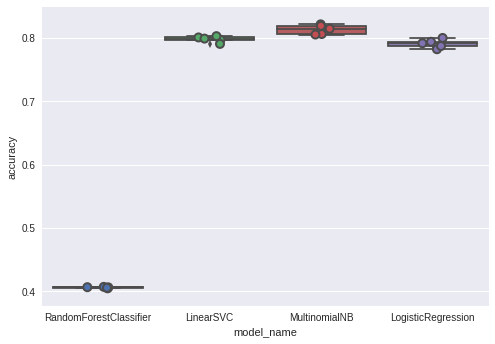

In [12]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [13]:
# list of accuracies
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.798355
LogisticRegression        0.791256
MultinomialNB             0.813627
RandomForestClassifier    0.405792
Name: accuracy, dtype: float64

In [0]:
# show discrepancies  in the model fit
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [0]:
# ---- #  using the same number of features.
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(tfidf_train_data, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
model.score(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_spooky = model.predict(tfidf_test_data )

In [16]:
# ---- # using multi-class logistic regression
model = LogisticRegression(random_state=0)
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(tfidf_train_data, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
model.score(X_train, y_train)
y_pred = model.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
# tfidf_train_data = vec.fit_transform(df.text) 
# tfidf_test_data = vec.transform(df_test.text)

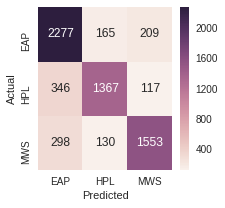

In [17]:
# index back to label??

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)

import seaborn as sns

fig, ax = plt.subplots(figsize=(3,3))

# sns.heatmap(conf_mat, annot=True, fmt='d')
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=(['EAP','HPL','MWS']), yticklabels=(['EAP','HPL','MWS',]))

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()